<a href="https://colab.research.google.com/github/dhrits/mec2-projects/blob/main/DSagar_Student_MLE_MiniProject_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Logistic Regression

Logistic Regression models the probability that a given input belongs to a certain class. It's suitable when the target variable is categorical and represents two classes (e.g., 0 or 1, True or False, Yes or No), although it can also be extended for problems with more than two classes. The key idea behind logistic regression is to model the relationship between the input variables (features) and the probability of the outcome.

In logistic regression, the linear combination of input features is transformed using a logistic function (also known as the sigmoid function), which ensures that the output is between 0 and 1. This output can be interpreted as the probability of the instance belonging to a particular class.

**Advantages of Logistic Regression:**

1. **Simple and Interpretable:** Logistic regression is a straightforward algorithm that's relatively easy to understand and interpret. The output is the probability of belonging to a certain class, and the coefficients associated with each feature provide insights into feature importance.

2. **Efficient for Small Datasets:** It works well with small datasets where the number of samples is not very large. It's less prone to overfitting in such cases compared to complex models.

3. **Works Well for Linearly Separable Data:** When the classes are separable by a linear decision boundary, logistic regression can perform quite well.

4. **Good Starting Point:** Logistic regression is often used as a starting point for understanding a classification problem. It can serve as a baseline model against which more complex algorithms can be compared.

5. **Regularization:** Logistic regression can be regularized to prevent overfitting. Regularization techniques like L1 (Lasso) and L2 (Ridge) regularization can be applied to control the complexity of the model.

6. **Probability Estimation:** Logistic regression not only provides class predictions but also outputs the probability of the prediction. This can be useful for decision-making in cases where the cost of misclassification varies.

However, it's important to note that logistic regression also has its limitations. It assumes a linear relationship between features and the log-odds of the target variable, which might not be suitable for highly complex relationships. Additionally, it might struggle with handling non-linear data without feature transformations. In such cases, more advanced techniques like decision trees, random forests, or neural networks might be more appropriate.

In this project you'll get some experience building a logistic regression model for the [Wisconsin Breast Cancer Detection dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Note, the task of training a logistic regression model has largely been asbtracted away by libraries like Scikit-Learn. In this mini-project we'll focus more on model evaluation and interpretation.  


First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression, like many statistical methods, comes with certain assumptions about the underlying data. Here are the main assumptions associated with logistic regression:

1. **Binary Outcome:** Logistic regression is designed for binary classification problems, where the dependent variable (target) should have two categories or levels. If you have a multi-class problem, you would typically use multinomial logistic regression or other appropriate techniques.

2. **Independence of Observations:** The observations (samples) should be independent of each other. This means that the outcome of one observation should not be influenced by the outcome of another observation. This assumption is often met when the data is collected using random sampling or experimental designs.

3. **Linearity of Log-Odds:** The relationship between the log-odds of the outcome and the predictors should be linear. In other words, the log-odds of the outcome variable should change linearly with changes in the predictor variables. This assumption can be checked by examining scatter plots and residual plots.

4. **No Multicollinearity:** There should not be high multicollinearity among the predictor variables. Multicollinearity can make it difficult to determine the individual effect of each predictor on the outcome. Techniques like variance inflation factor (VIF) can be used to assess multicollinearity.

5. **Large Sample Size:** While logistic regression is generally more robust to violations of assumptions compared to linear regression, having a reasonably large sample size helps in obtaining stable and reliable parameter estimates.

6. **Sufficient Variability in the Outcome:** The outcome variable should exhibit variation across different values of the predictor variables. If all values of a predictor are the same within a level of the outcome, the model may not be able to estimate the effect of that predictor.

7. **No Extreme Outliers:** Extreme outliers can influence the estimation of coefficients and affect the overall performance of the model. It's a good practice to identify and handle outliers before fitting the model.

It's important to note that while these assumptions are important to understand, logistic regression is often used in real-world scenarios where some of these assumptions may not be perfectly met. In such cases, it's crucial to assess the impact of potential violations on the model's results and make informed decisions about the model's suitability and reliability.

If the assumptions are significantly violated, it might be worth considering other techniques like decision trees, random forests, or support vector machines, which might be more robust to certain types of data characteristics. One of the best ways to see if logistic regression is suitable for a problem is to simply train a logistic regression model and evaluate it on test data.

Here are your tasks:

1. Load the [breast cancer data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) into a Pandas dataframe and create variables for the features and target.
2. Do a little exploratory data analysis to help familiarize yourself with the data. Look at the first few rows of data, for example. Generate some summary statistics for each feature. Look at the distribution of the target variable. Maybe create a pair-plot for some of the variables. Create a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) of correlation between features. Is the multicollinearity assumption broken? Also, generate some boxplots to see how feature distributions change for each target. This part is a bit open-ended. Be creative!

In [2]:
# Load data and split into feature and target variables

# Loading data in bunch format to view description of the dataset
data = load_breast_cancer()
print(data.DESCR)

# Loading data split into features and targets
features, target = load_breast_cancer(return_X_y=True, as_frame=True)
# Build aggregate dataframe as well for convenience in analysis
data = features.copy()
data['target'] = target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# View first 5 rows of the data
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# How frequently does the positive target occur?
num_malign = len(target[target == 0])
num_benign = len(target[target == 1])
print(f"Frequency of positive (0) class: {num_malign}/{len(target)} = {num_malign/float(len(target)) * 100:.2f}%")
print(f"Frequency of negative (1) class: {num_benign}/{len(target)} = {num_benign/float(len(target)) * 100:.2f}%")

Frequency of positive (0) class: 212/569 = 37.26%
Frequency of negative (1) class: 357/569 = 62.74%


In [5]:
# Redoing above analysis using data dataframe
data.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [6]:
# Generate summary statistics for the data
features.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


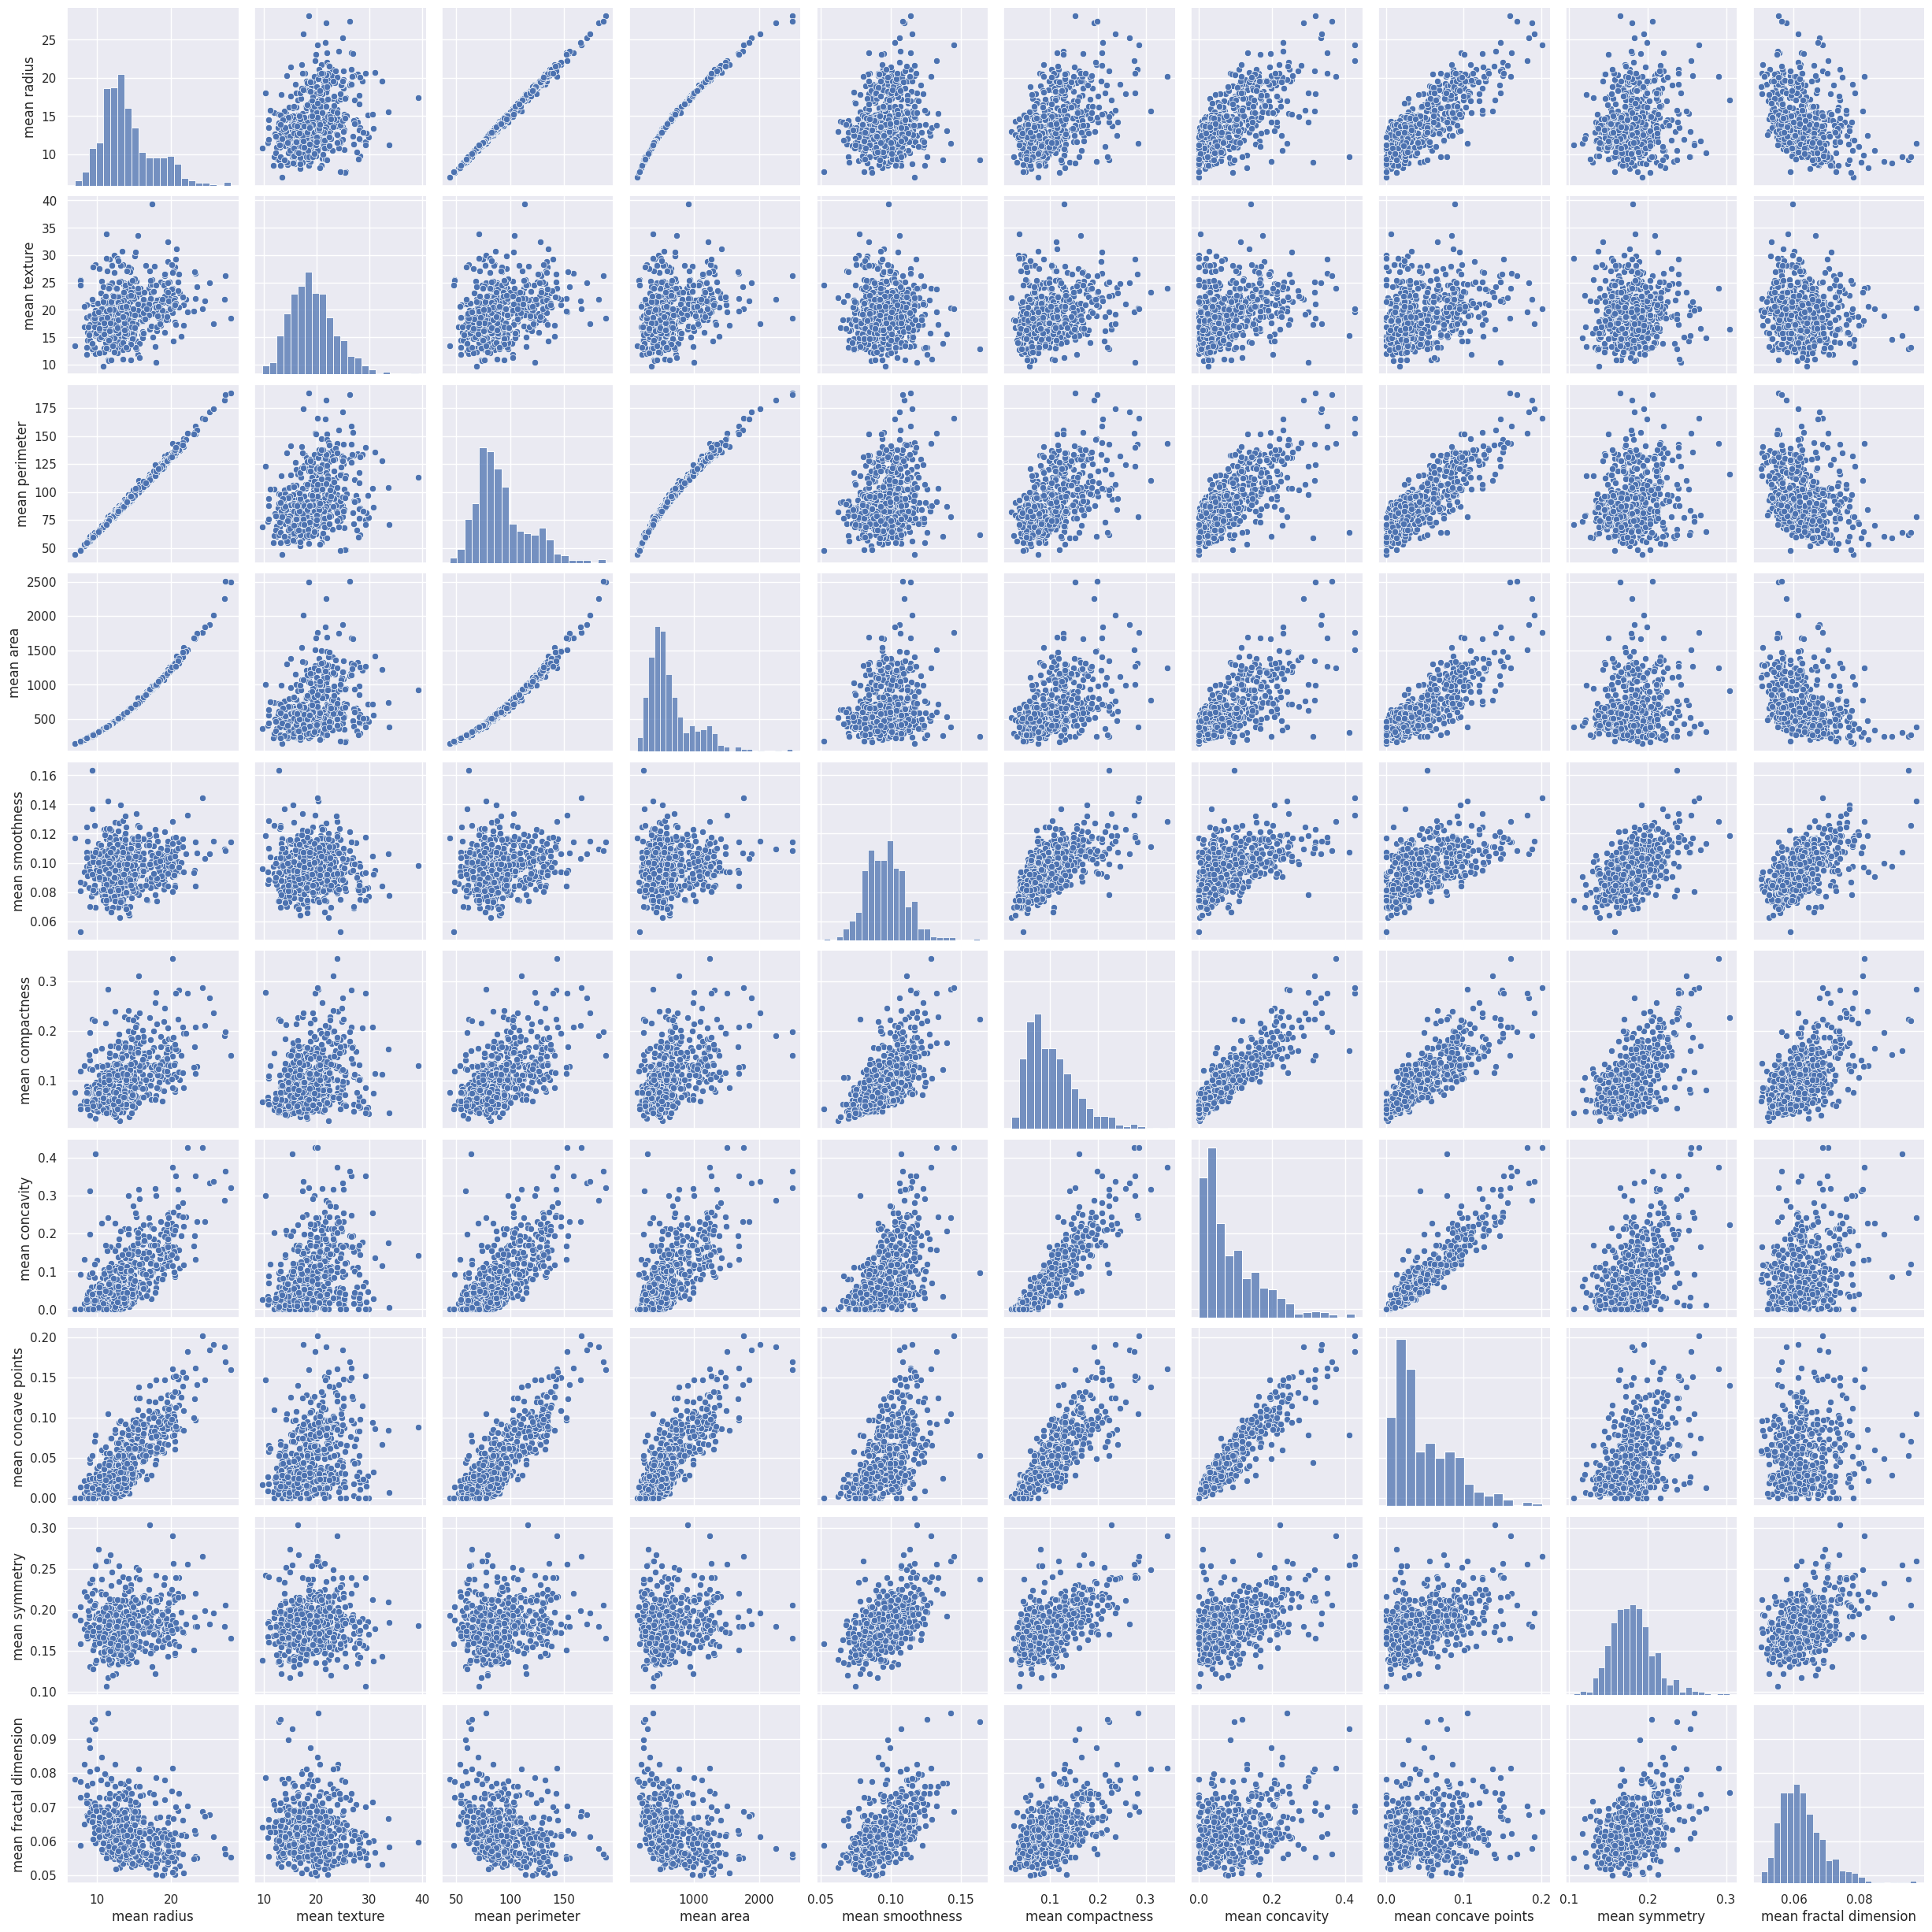

In [102]:
# Create a pairplot for the first few features
import seaborn as sns
sns.set()
sns.pairplot(features[features.columns[:10]])

<Axes: >

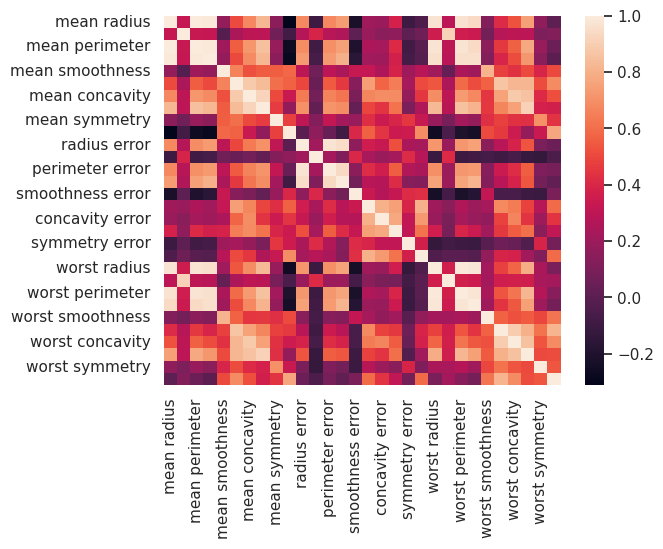

In [11]:
# Create a correlation coefficeint heatmap
corr = features.corr()
sns.heatmap(corr)

## Note 1
Just looking at the pairplots and heatmap above, it is clear that **multicollinearity is high** in this dataset. Some features are highly correlated (eg mean radius, mean perimeter, mean area).

<Axes: xlabel='target', ylabel='mean radius'>

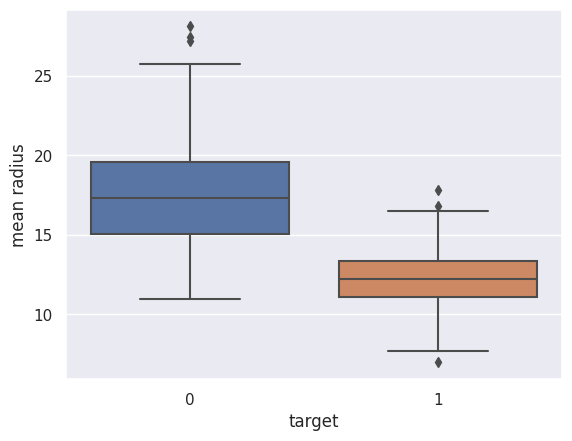

In [12]:
# Create a boxplot for mean radius by target type
sns.boxplot(x='target', y='mean radius', data=data)

## Note 2
It appears that "mean radius" values tend to be on the higher for the malignant (0) class than those for the benign (1) class.

Creating a few more box plots to see the relationships

<Axes: xlabel='target', ylabel='mean area'>

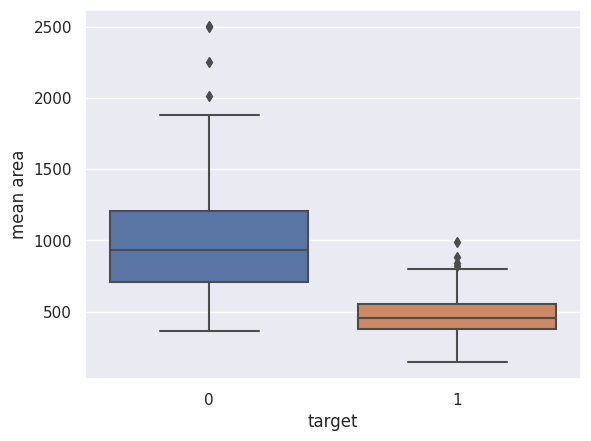

In [95]:
sns.boxplot(x='target', y='mean area', data=data)

<Axes: xlabel='target', ylabel='worst texture'>

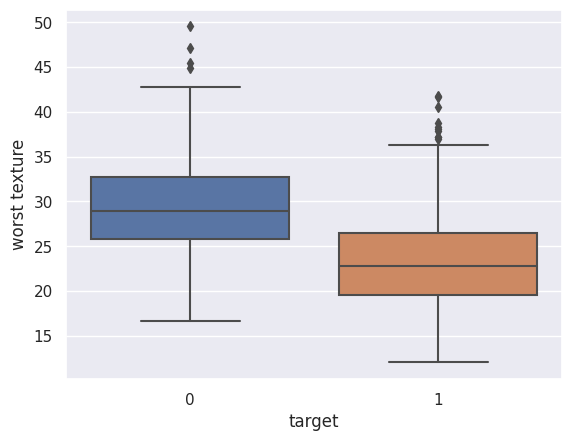

In [96]:
sns.boxplot(x='target', y='worst texture', data=data)

<Axes: xlabel='target', ylabel='worst smoothness'>

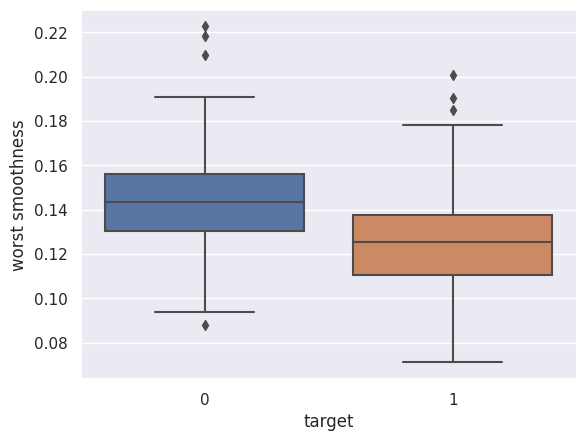

In [97]:
sns.boxplot(x='target', y='worst smoothness', data=data)

<Axes: xlabel='target', ylabel='worst radius'>

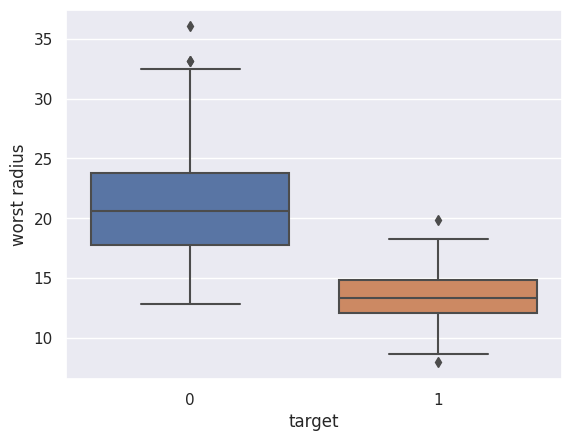

In [98]:
sns.boxplot(x='target', y='worst radius', data=data)

<Axes: xlabel='target', ylabel='worst perimeter'>

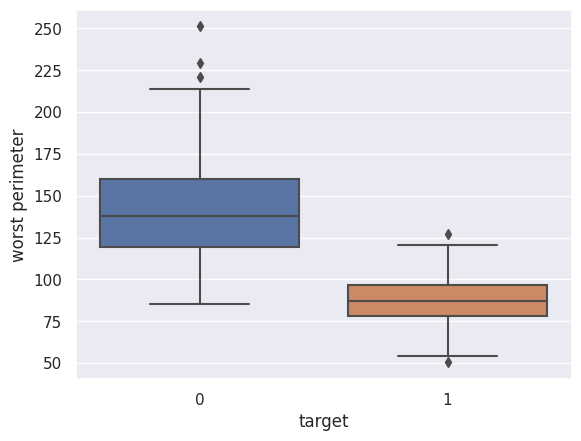

In [99]:
sns.boxplot(x='target', y='worst perimeter', data=data)

<Axes: xlabel='target', ylabel='worst area'>

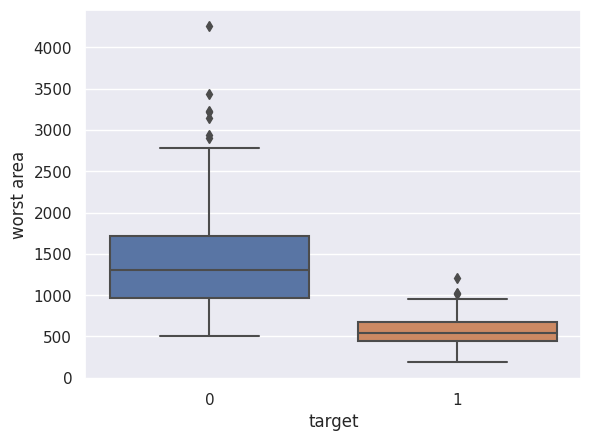

In [100]:
sns.boxplot(x='target', y='worst area', data=data)

With a better feel for the data, it's time to attempt to build a logistic regression model.

1. Use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and test sets for the data.
2. Use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a model on the training data. Make sure you understand the inputs to the model. Try using the "liblinear" solver here.

In [101]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target)

## Note 3
While I've trained a simple logistic regression model below, results of the fit are much better when I apply a standard scalar and create a pipeline. I've left the code commented out.

However, I noticed that the sections below ask to scale the coefficients with the standard deviation of the features, so I opted to continue with a simple fit. By scaling the features ahead of time, the coefficients would be directly comparable.

In [33]:
# Build and train logistic regression model
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# clf = LogisticRegression(max_iter=1000)
# scaler = StandardScaler().set_output(transform='pandas')
# pipeline = make_pipeline(scaler, clf)
# pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [34]:
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

As you can see, training a logistic regression model is simple. The more important task is evaluating the model and determining if it's any good. For classification problems, a good starting point for model evaluation is the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It provides a clear and detailed breakdown of how well a model's predictions align with the actual outcomes in a binary classification problem. It's particularly useful for understanding the types of errors a model is making.

A confusion matrix is typically presented as a table with four entries:

- **True Positives (TP):** The number of instances that were correctly predicted as positive (belonging to the positive class).

- **True Negatives (TN):** The number of instances that were correctly predicted as negative (belonging to the negative class).

- **False Positives (FP):** Also known as a Type I error. The number of instances that were predicted as positive but actually belong to the negative class.

- **False Negatives (FN):** Also known as a Type II error. The number of instances that were predicted as negative but actually belong to the positive class.

Here's how these four components fit into the confusion matrix:

```
                Predicted
               |  Positive  |  Negative
Actual  Positive |    TP      |    FN
        Negative |    FP      |    TN
```

Each cell of the confusion matrix represents a specific classification outcome. The goal is to have as many instances as possible in the TP and TN cells, and as few as possible in the FP and FN cells.

From the confusion matrix, several evaluation metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

   `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision:** The proportion of correctly predicted positive instances out of all predicted positive instances. It measures the model's ability to avoid false positives.

   `Precision = TP / (TP + FP)`

- **Recall (Sensitivity or True Positive Rate):** The proportion of correctly predicted positive instances out of all actual positive instances. It measures the model's ability to capture all positive instances.

   `Recall = TP / (TP + FN)`

- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that takes into account both false positives and false negatives.

   `F1-Score = 2 * (Precision * Recall) / (Precision + Recall)`

Confusion matrices provide valuable insights into the strengths and weaknesses of a classification model. They allow you to understand where the model is making mistakes and guide further improvements or adjustments.

Here are your tasks:

1. Use your model to make predictions on the test data.
2. Generate a confusion matrix with the test results. How many false positives and false negatives did the model predict?
3. Use [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to generate further analysis of your model's predictions. Make sure you understand everything in the report and are able to explain what all the metrics mean.

Note, the macro average in the report calculates the metrics independently for each class and then takes the average across all classes. In other words, it treats all classes equally, regardless of their frequency in the dataset. This can be useful when you want to assess the model's overall performance without being biased by the class imbalances.

The weighted average in the report, on the other hand, calculates the metrics for each class and then takes the average, weighted by the number of true instances for each class. This gives more weight to classes with more instances, which can be particularly useful in imbalanced datasets where some classes might have much fewer instances than others.

In [45]:
# Evaluate the model
# Computing a accuracy score
y_test_preds = clf.predict(X_test)
print(f"Accuracy of the model on test data: {clf.score(X_test, y_test):.3f}")

Accuracy of the model on test data: 0.944


In [46]:
# Generate a confusion matrix
print("Displaying simple confusion matrix")
conf = confusion_matrix(y_test, y_test_preds)
print(conf)

Displaying simple confusion matrix
[[43  4]
 [ 4 92]]


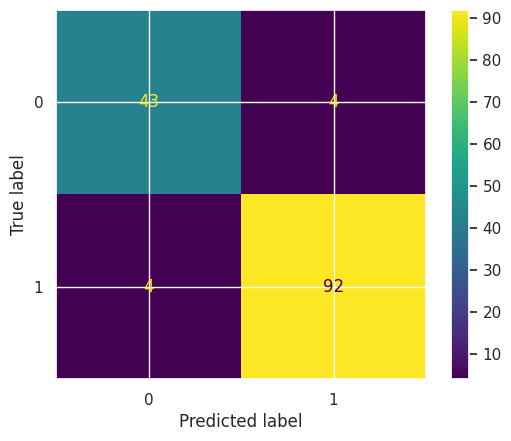

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf)
disp.plot()

In [48]:
# Generate a classification report
report = classification_report(y_test, y_test_preds)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.96      0.96      0.96        96

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Feature importance refers to the process of determining and quantifying the contribution of each feature (also known as predictor variable or attribute) in a machine learning model towards making accurate predictions. It helps in understanding which features have the most significant impact on the model's output and can be crucial for interpreting and explaining the model's behavior.

In logistic regression models, you can calculate feature importance by examining the coefficients associated with each feature. These coefficients indicate the change in the log-odds of the target variable for a one-unit change in the corresponding feature, while keeping other features constant. The magnitude of the coefficient reflects the strength of the impact that the feature has on the predicted outcome.

The magnitude of the coefficients indicates the importance of each feature. Larger magnitudes imply a stronger impact on the predicted probability of the positive class.

**Positive Coefficient**: An increase in the feature value leads to an increase in the log-odds of the positive class, implying a higher probability of belonging to the positive class.

**Negative Coefficient**: An increase in the feature value leads to a decrease in the log-odds of the positive class, implying a lower probability of belonging to the positive class.

Remember that the scale of the features matters when interpreting coefficients. If features are on different scales, their coefficients won't be directly comparable. This is where normalization can be helpful. Also, keep in mind that this interpretation assumes a linear relationship between the features and the log-odds of the target variable. If your logistic regression model includes interactions or polynomial terms, the interpretation can become more complex. Additionally, be cautious about interpreting coefficients as causal relationships, as logistic regression only captures associations, not causal effects.

Here are your tasks:

1. Extract the model coefficients from your trained model.
2. Normalize the coefficients by the standard deviation of each feature in the training data.
3. Sort feature names and coefficients by absolute value of coefficients.
4. Visualize the feature importances by creating a horizontal bar chart using e.g. [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Based on magnitude, what appears to be the most important predictor of cancer in this dataset?

In [53]:
# Extract coefficients
print("Displaying coefficients of logistic regression")
series = pd.Series(clf.coef_[0], index=features.columns)
series

Displaying coefficients of logistic regression


mean radius                1.085321
mean texture               0.175542
mean perimeter            -0.499663
mean area                  0.043897
mean smoothness           -0.132269
mean compactness          -0.226671
mean concavity            -0.515453
mean concave points       -0.243319
mean symmetry             -0.159264
mean fractal dimension    -0.033224
radius error              -0.039488
texture error              0.349010
perimeter error            0.370097
area error                -0.093849
smoothness error          -0.026906
compactness error          0.025812
concavity error           -0.080052
concave points error      -0.035282
symmetry error            -0.046447
fractal dimension error    0.009233
worst radius               0.442290
worst texture             -0.425511
worst perimeter           -0.145555
worst area                -0.020235
worst smoothness          -0.229490
worst compactness         -0.485705
worst concavity           -1.005533
worst concave points      -0

In [57]:
# Normalize the coefficients by the standard deviation

# Computing standard deviation over the train set
feature_stds = np.std(X_train, axis=0)
scaled_coefs = clf.coef_[0]/feature_stds
scaled_coefs

mean radius                 0.298512
mean texture                0.042530
mean perimeter             -0.019943
mean area                   0.000120
mean smoothness            -9.368812
mean compactness           -4.238407
mean concavity             -6.317787
mean concave points        -6.125222
mean symmetry              -6.000707
mean fractal dimension     -4.571075
radius error               -0.138658
texture error               0.673580
perimeter error             0.175578
area error                 -0.001935
smoothness error           -8.694234
compactness error           1.398495
concavity error            -2.505276
concave points error       -5.504946
symmetry error             -5.391122
fractal dimension error     3.358272
worst radius                0.090453
worst texture              -0.071904
worst perimeter            -0.004275
worst area                 -0.000035
worst smoothness          -10.140335
worst compactness          -3.046507
worst concavity            -4.733670
w

In [58]:
# Sort feature names and coefficients by absolute value of coefficients
# Sort in descending order
order = np.argsort(np.abs(scaled_coefs))
order = order[::-1]
series = pd.Series(scaled_coefs[order], index=features.columns[order])
series

worst smoothness          -10.140335
mean smoothness            -9.368812
smoothness error           -8.694234
worst symmetry             -6.949906
worst concave points       -6.428214
mean concavity             -6.317787
mean concave points        -6.125222
mean symmetry              -6.000707
concave points error       -5.504946
symmetry error             -5.391122
worst concavity            -4.733670
mean fractal dimension     -4.571075
mean compactness           -4.238407
fractal dimension error     3.358272
worst compactness          -3.046507
worst fractal dimension    -2.709785
concavity error            -2.505276
compactness error           1.398495
texture error               0.673580
mean radius                 0.298512
perimeter error             0.175578
radius error               -0.138658
worst radius                0.090453
worst texture              -0.071904
mean texture                0.042530
mean perimeter             -0.019943
worst perimeter            -0.004275
a

<Axes: xlabel='feature', ylabel='importance'>

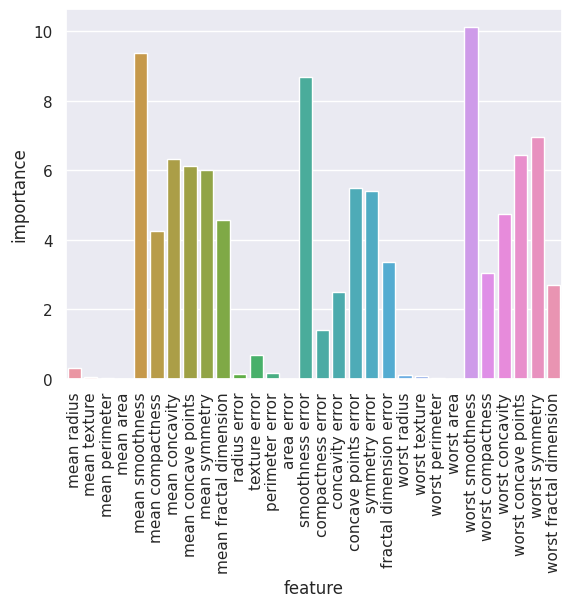

In [65]:
# Visualize feature importances
frame = pd.DataFrame({'feature': features.columns, 'importance': np.abs(scaled_coefs)})
barplot = sns.barplot(x='feature', y='importance', data=frame)
for item in barplot.get_xticklabels():
    item.set_rotation(90)
barplot

Simply looking at absolute values of the coefficients, it apepars that **"worst smoothness"** is the most important feature in the dataset.

## Using pipelines to do the same analysis
This time we'll standardize the features.

In [103]:
# Build and train logistic regression model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(max_iter=1000)
scaler = StandardScaler().set_output(transform='pandas')
pipeline = make_pipeline(scaler, clf)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [104]:
y_test_preds = pipeline.predict(X_test)
print(f"Accuracy on test data: {pipeline.score(X_test, y_test):.3f}")

Accuracy on test data: 0.986


## Note 4
Although this is a relatively simple dataset, the accuracy is higher when scaling the features.

In [105]:
conf = confusion_matrix(y_test, y_test_preds)
conf

array([[43,  2],
       [ 0, 98]])

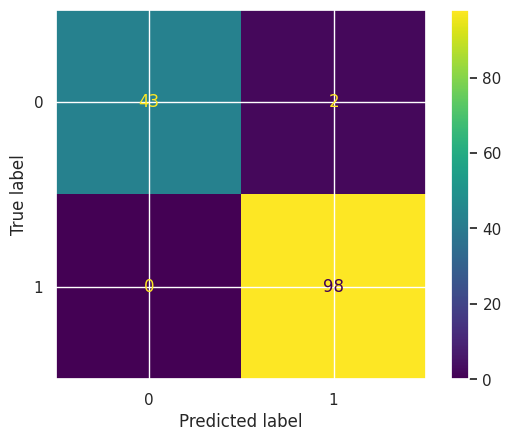

In [106]:
disp = ConfusionMatrixDisplay(conf)
disp.plot()

In [107]:
report = classification_report(y_test, y_test_preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.98      1.00      0.99        98

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [108]:
coefs = pipeline[1].coef_[0]

# Since we apply standard scaler as part of the pipeline,
# standard deviation of all features used in regression
# is 1
order = np.argsort(np.abs(coefs))
order = order[::-1]
series = pd.Series(coefs[order], index=features.columns[order])
series

worst texture             -1.443220
radius error              -1.063115
worst radius              -1.056312
worst area                -1.006858
area error                -0.932960
worst perimeter           -0.891505
worst concave points      -0.856154
mean concave points       -0.849149
worst symmetry            -0.835064
compactness error          0.823741
mean concavity            -0.814453
worst concavity           -0.805333
fractal dimension error    0.748390
perimeter error           -0.739576
mean area                 -0.618553
mean radius               -0.569407
mean perimeter            -0.553418
worst smoothness          -0.520500
smoothness error          -0.392962
worst fractal dimension   -0.382035
texture error              0.372003
symmetry error             0.361743
mean compactness           0.325315
mean texture              -0.294107
mean smoothness           -0.180550
worst compactness          0.169116
concave points error      -0.074136
concavity error           -0

<Axes: xlabel='feature', ylabel='importance'>

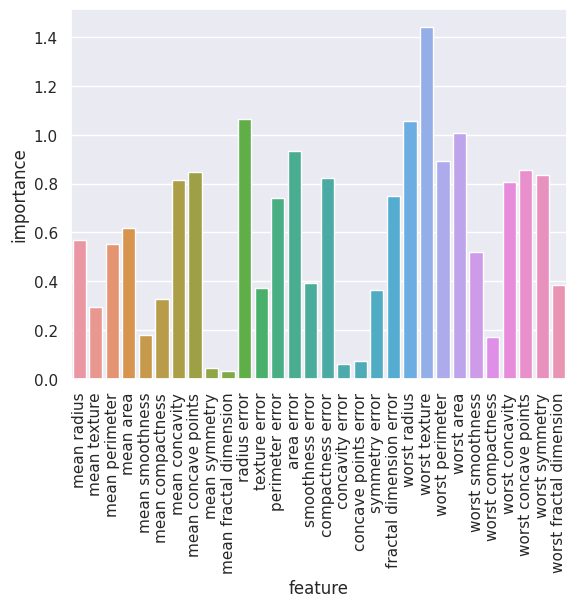

In [109]:
frame2 = pd.DataFrame({'feature': features.columns, 'importance': np.abs(coefs)})
barplot2 = sns.barplot(x='feature', y='importance', data=frame2)
for item in barplot2.get_xticklabels():
    item.set_rotation(90)
barplot2

] **"worst texture"** is now the most important feature.